# Projekt PSI
Analiza 5: co jest silniejsze w niespójnym warunku (inc): dźwięk vs obraz? a może negatywne vs pozytywne? (np. nieważne czy negatywny jest dźwięk czy obraz, ważne że co najmniej jedno jest negatywne i całość też jest negatywna)


## Loading data

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt

Ten sposób jakiś upośledzony jest, można to jakoś mądrzej zrobić. A i w sumie to nam to chyba nie potrzebne xd

In [2]:
hr = pandas.read_csv("../data/2019-afcai-spring/bitalino/1107_opensignals_prawestanowisko_2019-04-19_09-11-49.txt", skiprows=[0,2], header=1, sep="\t", names=[ "nSeq", "aa", "I2", "O1", "O2", "A5", "A6", "NaN"])
hr = hr.drop(["aa", "I2", "O1", "O2", "NaN"], axis=1)
hr

,nSeq,A5,A6
0,1,506,212
1,2,504,212
2,3,501,212
3,4,499,212
4,5,497,212
5,6,495,212
6,7,493,212
7,8,491,212
8,9,489,212
9,10,487,211


In [3]:

images_params = pandas.read_csv("../data/IAPS.csv", sep=";", header=0, decimal=",")
sounds_params = pandas.read_csv("../data/IADS2.csv", sep=";", header=0, decimal=",")

images_params


,Description,IAPS,ValenceMean,ValenceSD,ArousalMean,ArousalSD,set
0,Snake,1019.0,3.95,1.96,5.77,1.83,12
1,Snake,1022.0,4.26,2.04,6.02,1.97,12
2,Snake,1026.0,4.09,1.91,5.61,2.23,16
3,Snake,1030.0,4.30,2.35,5.46,2.43,1
4,Snake,1033.0,3.87,1.94,6.13,2.15,18
5,Snake,1040.0,3.99,2.24,6.25,2.13,1
6,Snake,1050.0,3.46,2.15,6.87,1.68,6
7,Snake,1051.0,3.80,1.75,5.95,1.98,12
8,Snake,1052.0,3.50,1.87,6.52,2.23,11
9,Snake,1070.0,3.96,2.30,6.16,2.08,1


In [4]:
procedure = pandas.read_csv("../data/2019-afcai-spring/procedura/1107_2019_Apr_19_0712.txt", sep="\t", names=["person_id", "stimulus_id", "condition", "condition_details", "sound", "image", "widget", "response", "response_time", "timestamp" ])
procedure = procedure.loc[procedure['condition'] == 'inc'].loc[procedure['widget'] == 'emospace1']
procedure = procedure.join(sounds_params.set_index('Number'), on="sound", rsuffix='_sound')
procedure = procedure.join(images_params.set_index('IAPS'), on='image', rsuffix='_image')
procedure = procedure.astype({"response_time": float})
procedure

/home/piotr/anaconda3/envs/psi-project/lib/python3.7/site-packages/pandas/core/reshape/merge.py:946: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


,person_id,stimulus_id,condition,condition_details,sound,image,widget,response,response_time,timestamp,...,ValenceMean,ValenceSD,ArousalMean,ArousalSD,Description,ValenceMean_image,ValenceSD_image,ArousalMean_image,ArousalSD_image,set
6,1107,6,inc,p+s-,422,4800,emospace1,"[0.0, -0.8871154785156252]",2.803024,1.555651e+09,...,2.22,1.47,7.52,1.90,EroticCouple,6.44,2.22,7.07,1.78,6.0
7,1107,7,inc,p-s+,355,3150,emospace1,"[-0.889205932617187, 0.0]",2.419283,1.555651e+09,...,6.77,1.84,6.32,1.66,Mutilation,2.26,1.57,6.55,2.20,2.0
8,1107,8,inc,p+s-,277,4647,emospace1,"[-0.6720916748046881, -0.6839477539062505]",2.686227,1.555651e+09,...,1.63,1.13,7.79,1.63,EroticCouple,5.89,1.95,6.21,2.26,15.0
9,1107,9,inc,p+s-,719,5215,emospace1,"[-0.6523760986328123, 0.6662744140625002]",2.519347,1.555651e+09,...,2.89,1.67,6.91,2.02,Harbor,6.83,1.70,5.40,2.15,20.0
10,1107,10,inc,p-s+,311,8230,emospace1,"[-0.848992919921875, 0.0]",2.335886,1.555651e+09,...,7.65,1.58,7.12,1.83,Boxer,2.95,1.88,5.91,2.15,4.0
14,1107,14,inc,p-s+,808,3010,emospace1,"[0.8944860839843755, -0.016984252929687502]",2.853137,1.555651e+09,...,6.32,1.76,6.35,2.15,Mutilation,1.71,1.19,7.16,2.24,2.0
14,1107,14,inc,p-s+,808,3010,emospace1,"[0.8944860839843755, -0.016984252929687502]",2.853137,1.555651e+09,...,6.32,1.76,6.35,2.15,Mutilation,1.79,1.28,7.26,1.86,3.0
18,1107,18,inc,p+s-,288,4668,emospace1,"[0.6574371337890625, -0.6201428222656251]",2.969861,1.555651e+09,...,2.71,1.75,6.82,1.63,EroticCouple,6.67,1.69,7.13,1.62,20.0
19,1107,19,inc,p+s-,290,4697,emospace1,"[-0.637518310546875, -0.62601806640625]",2.136051,1.555651e+09,...,1.65,1.27,7.61,1.99,EroticCouple,6.22,1.76,6.62,1.69,17.0
20,1107,20,inc,p-s+,815,9622,emospace1,"[0.6604333496093752, 0.6413775634765618]",1.968839,1.555651e+09,...,7.9,1.53,6.85,2.16,Jet,3.10,1.90,6.26,1.98,7.0


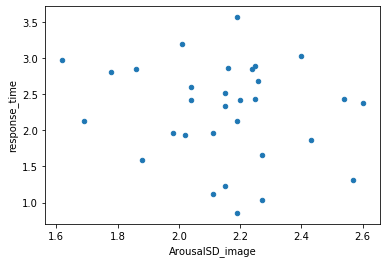

In [15]:
procedure.plot(kind='scatter', x='ArousalSD_image', y='response_time')
